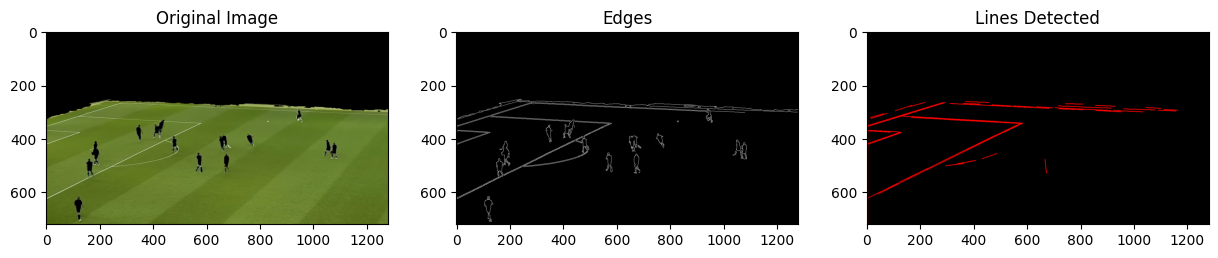

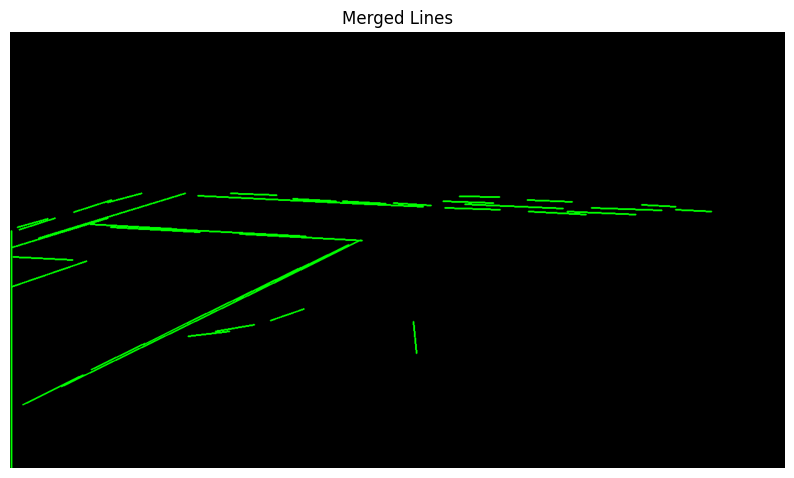

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/green_region.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detector with adjusted parameters
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Use Probabilistic Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)

# Create a copy of the original image to draw lines
line_image = np.zeros_like(image)

# Draw lines on the image in red color
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Red color

# Display the original image, edges, and the image with lines
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Lines Detected')
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))

plt.show()

# Saving the Line Image
# cv2.imwrite('lines_of_field.png', line_image)

# Function to merge parallel lines
def merge_parallel_lines(lines, angle_threshold=np.pi / 180, distance_threshold=10):
    def compute_angle(line):
        x1, y1, x2, y2 = line
        return np.arctan2(y2 - y1, x2 - x1)

    merged_lines = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if not merged_lines:
            merged_lines.append([x1, y1, x2, y2])
        else:
            for merged_line in merged_lines:
                mx1, my1, mx2, my2 = merged_line
                angle1 = compute_angle((x1, y1, x2, y2))
                angle2 = compute_angle((mx1, my1, mx2, my2))
                if abs(angle1 - angle2) < angle_threshold:
                    if (abs(x1 - mx1) < distance_threshold and abs(y1 - my1) < distance_threshold) or \
                       (abs(x2 - mx2) < distance_threshold and abs(y2 - my2) < distance_threshold):
                        merged_line[0] = (x1 + mx1) // 2
                        merged_line[1] = (y1 + my1) // 2
                        merged_line[2] = (x2 + mx2) // 2
                        merged_line[3] = (y2 + my2) // 2
                        break
            else:
                merged_lines.append([x1, y1, x2, y2])
    return merged_lines

# Merge parallel lines
if lines is not None:
    merged_lines = merge_parallel_lines(lines)

    # Draw the merged lines on the image
    # result_image = image.copy()
    result_image = np.zeros_like(image)
    for line in merged_lines:
        x1, y1, x2, y2 = line
        cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green color

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.title('Merged Lines')
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No lines were detected.")

# Saving the Merged Line Image
cv2.imwrite('./assets/merged_lines_of_field.png', result_image)
